In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("15-gym_crowdedness.csv")

In [8]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [10]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [11]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [12]:
df["date"] = pd.to_datetime(df["date"], utc=True)

In [13]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-15 00:00:11+00:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-15 00:20:14+00:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-15 00:30:15+00:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-15 00:40:16+00:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-15 00:50:17+00:00,64217,4,0,0,71.76,0,0,8,17


In [14]:
df["year"] = df["date"].dt.year

In [15]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,2015-08-15 00:00:11+00:00,61211,4,0,0,71.76,0,0,8,17,2015
1,45,2015-08-15 00:20:14+00:00,62414,4,0,0,71.76,0,0,8,17,2015
2,40,2015-08-15 00:30:15+00:00,63015,4,0,0,71.76,0,0,8,17,2015
3,44,2015-08-15 00:40:16+00:00,63616,4,0,0,71.76,0,0,8,17,2015
4,45,2015-08-15 00:50:17+00:00,64217,4,0,0,71.76,0,0,8,17,2015


In [16]:
df["year"].value_counts()

year
2016    45539
2015    13529
2017     3116
Name: count, dtype: int64

In [17]:
df["day"] = df["date"].dt.day

In [18]:
df["month"]

0        8
1        8
2        8
3        8
4        8
        ..
62179    3
62180    3
62181    3
62182    3
62183    3
Name: month, Length: 62184, dtype: int64

In [19]:
df.drop("date", axis=1, inplace=True)

In [20]:
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day
0,37,61211,4,0,0,71.76,0,0,8,17,2015,15
1,45,62414,4,0,0,71.76,0,0,8,17,2015,15
2,40,63015,4,0,0,71.76,0,0,8,17,2015,15
3,44,63616,4,0,0,71.76,0,0,8,17,2015,15
4,45,64217,4,0,0,71.76,0,0,8,17,2015,15


<Axes: xlabel='hour', ylabel='number_people'>

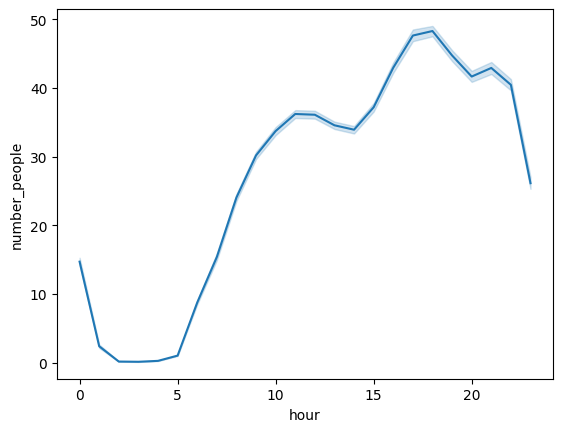

In [21]:
sns.lineplot(df, x="hour", y="number_people")

<Axes: xlabel='day_of_week', ylabel='number_people'>

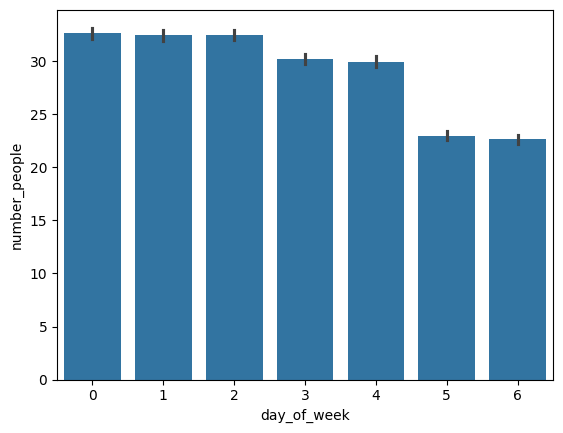

In [22]:
sns.barplot(df, x="day_of_week", y="number_people")

<Axes: xlabel='is_holiday', ylabel='number_people'>

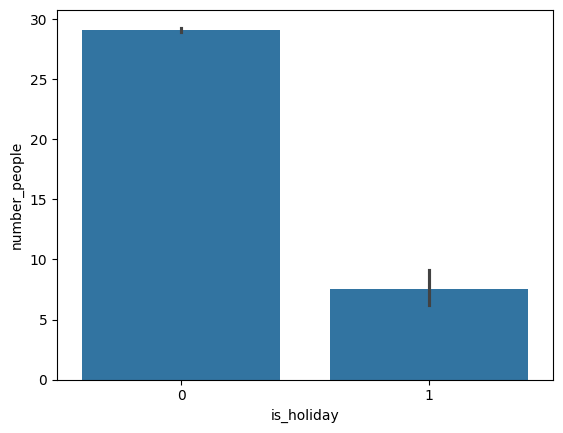

In [23]:
sns.barplot(df, x="is_holiday", y="number_people")

<Axes: >

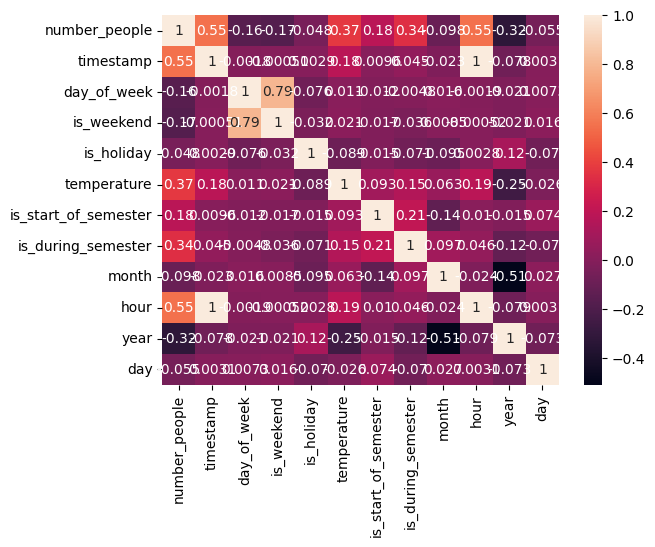

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [25]:
df.drop("timestamp", axis=1, inplace=True)

In [26]:
df.corr()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day
number_people,1.000000,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049,-0.322591,-0.055058
day_of_week,-0.162062,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914,-0.021242,0.007330
is_weekend,-0.173958,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517,-0.021260,0.015915
is_holiday,-0.048249,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843,0.121129,-0.069669
temperature,0.373327,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121,-0.249638,-0.025798
is_start_of_semester,0.182683,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091,-0.015377,0.073694
is_during_semester,0.335350,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581,-0.124302,-0.069675
month,-0.097854,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624,-0.508552,0.026787
hour,0.552049,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000,-0.078816,0.003119
year,-0.322591,-0.021242,-0.021260,0.121129,-0.249638,-0.015377,-0.124302,-0.508552,-0.078816,1.000000,-0.072977


In [27]:
X = df.drop("number_people", axis=1)
y = df["number_people"]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
def calculate(true, pred):
    mae = mean_squared_error(true, pred)
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    rmse = np.sqrt(mse)
    return mae, rmse, r2
    

In [33]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNeighborsTransformer": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

In [34]:
for _,model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    mae, rmse, r2 = calculate(y_train, y_train_pred)
    print(_)
    print(mae)
    print(rmse)
    print(r2)
    print("---------------------------------------")
    mae, rmse, r2 = calculate(y_test, y_test_pred)
    print(mae)
    print(rmse)
    print(r2)
    print("*****************************************")

LinearRegression
203.36722664843325
14.260688154799306
0.60340940804747
---------------------------------------
207.57102704098062
14.407325464532986
0.6013275046444239
*****************************************
Ridge
203.3672268117478
14.260688160525346
0.603409407728987
---------------------------------------
207.5710320989515
14.407325640067677
0.6013274949298029
*****************************************
Lasso
211.6384003746327
14.547797096970823
0.5872796228393236
---------------------------------------
215.67318657968733
14.685815829557693
0.585766044997999
*****************************************
KNeighborsTransformer
27.774269050988465
5.270129889384934
0.9458368293381789
---------------------------------------
49.477118229769715
7.033997315166513
0.9049714862962506
*****************************************
DecisionTreeRegressor
21.447673025179036
4.631163247519897
0.9581744537640544
---------------------------------------
41.52865151922509
6.444272768840957
0.9202377549220638
*

In [38]:
knn_params = {
    "n_neighbors" : [2,3,10,20,40,50]
}
rf_params = {
    "max_depth": [5,8,10,15,None],
    "max_features": ["sqrt", "log2",5,7,10],
    "min_samples_split": [2,8,12,20],
    "n_estimators": [100,200,500,1000]
}
from sklearn.model_selection import RandomizedSearchCV

In [39]:
randomcv_models = [
    ("KNN", KNeighborsRegressor(), knn_params),
    ("RF", RandomForestRegressor(), rf_params)
]

In [40]:
for name, model, params in randomcv_models:
    randomvc_model = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=3, n_jobs=-1)
    randomvc_model.fit(X_train, y_train)
    print(f"best parasm for {name}:\n{randomvc_model.best_params_}")

c:\Users\Arda\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best parasm for KNN:
{'n_neighbors': 2}
best parasm for RF:
{'n_estimators': 200, 'min_samples_split': 8, 'max_features': 5, 'max_depth': None}
